In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Finpro Rakamin Group 1/employee_churn_prediction_updated.csv')
data = pd.read_csv('employee_churn_prediction_updated.csv')
data.sample(5)

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period
521,522,31,Female,Diploma,1,76,0.61,55,12,4496030,0.08,2,Suburban,4,3.7,1,Married,30,3 Months
737,738,30,Male,Diploma,1,69,0.98,51,4,3689317,0.03,3,Suburban,3,3.1,0,Single,38,Stayed
740,741,40,Male,Bachelor,9,107,1.08,65,10,7315596,0.06,3,Urban,1,0.3,1,Single,5,1 Month
660,661,43,Male,Bachelor,2,174,0.90,49,4,7895035,0.05,2,Suburban,4,2.2,0,Single,33,Stayed
411,412,29,Male,Diploma,9,161,1.10,68,1,7838094,0.03,3,Suburban,2,4.4,1,Married,39,1 Month


### EDA
univariate  
bivariate  
multivariate  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [ ]:
#DESCRIBE DATA NUMERIC
data.describe()

,employee_id,age,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,manager_support_score,company_tenure_years,churn,distance_to_office_km
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,32.84,4.50,125.88,0.79,54.10,9.51,5487913.87,0.06,2.52,2.53,2.60,0.63,24.12
std,288.82,6.85,2.89,43.90,0.23,8.72,5.74,1436482.19,0.02,1.13,1.12,1.40,0.48,13.98
min,1.00,22.00,0.00,50.00,0.40,40.00,0.00,3000037.00,0.02,1.00,1.00,0.10,0.00,1.00
25%,250.75,27.00,2.00,86.75,0.59,46.00,5.00,4258969.50,0.04,2.00,2.00,1.40,0.00,12.00
50%,500.50,33.00,5.00,127.50,0.79,54.00,9.50,5471270.00,0.06,3.00,3.00,2.60,1.00,23.50
75%,750.25,39.00,7.00,164.00,0.99,62.00,15.00,6727894.00,0.08,4.00,4.00,3.80,1.00,36.00
max,1000.00,44.00,9.00,199.00,1.20,69.00,19.00,7999712.00,0.10,4.00,4.00,5.00,1.00,49.00


In [ ]:
# data numerical
num_dtypes =['int64','float64']

num_data = data.select_dtypes(include=num_dtypes)
nums = num_data.columns

print(nums)

Index(['employee_id', 'age', 'experience_years', 'monthly_target',
       'target_achievement', 'working_hours_per_week',
       'overtime_hours_per_week', 'salary', 'commission_rate',
       'job_satisfaction', 'manager_support_score', 'company_tenure_years',
       'churn', 'distance_to_office_km'],
      dtype='object')


In [ ]:
# data category
set_nums = set(nums)
set_all_columns = set(data.columns)

set_cats = set_all_columns - set_nums

cats = list(set_cats)

cats


['marital_status', 'education', 'churn_period', 'work_location', 'gender']

In [ ]:
# DESCRIBE DATA CATEGORY
data[cats].describe()

,marital_status,education,churn_period,work_location,gender
count,1000,1000,1000,1000,1000
unique,2,3,4,3,2
top,Single,Diploma,Stayed,Urban,Male
freq,606,404,371,500,703


In [ ]:
data['churn'].value_counts()

,count
churn,
1,629
0,371


In [ ]:
# OUTLIER
for col in nums:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f'{col}: {len(outliers)} outlier')

employee_id: 0 outlier
age: 0 outlier
experience_years: 0 outlier
monthly_target: 0 outlier
target_achievement: 0 outlier
working_hours_per_week: 0 outlier
overtime_hours_per_week: 0 outlier
salary: 0 outlier
commission_rate: 0 outlier
job_satisfaction: 0 outlier
manager_support_score: 0 outlier
company_tenure_years: 0 outlier
churn: 0 outlier
distance_to_office_km: 0 outlier


In [ ]:
data.duplicated().any()

np.False_

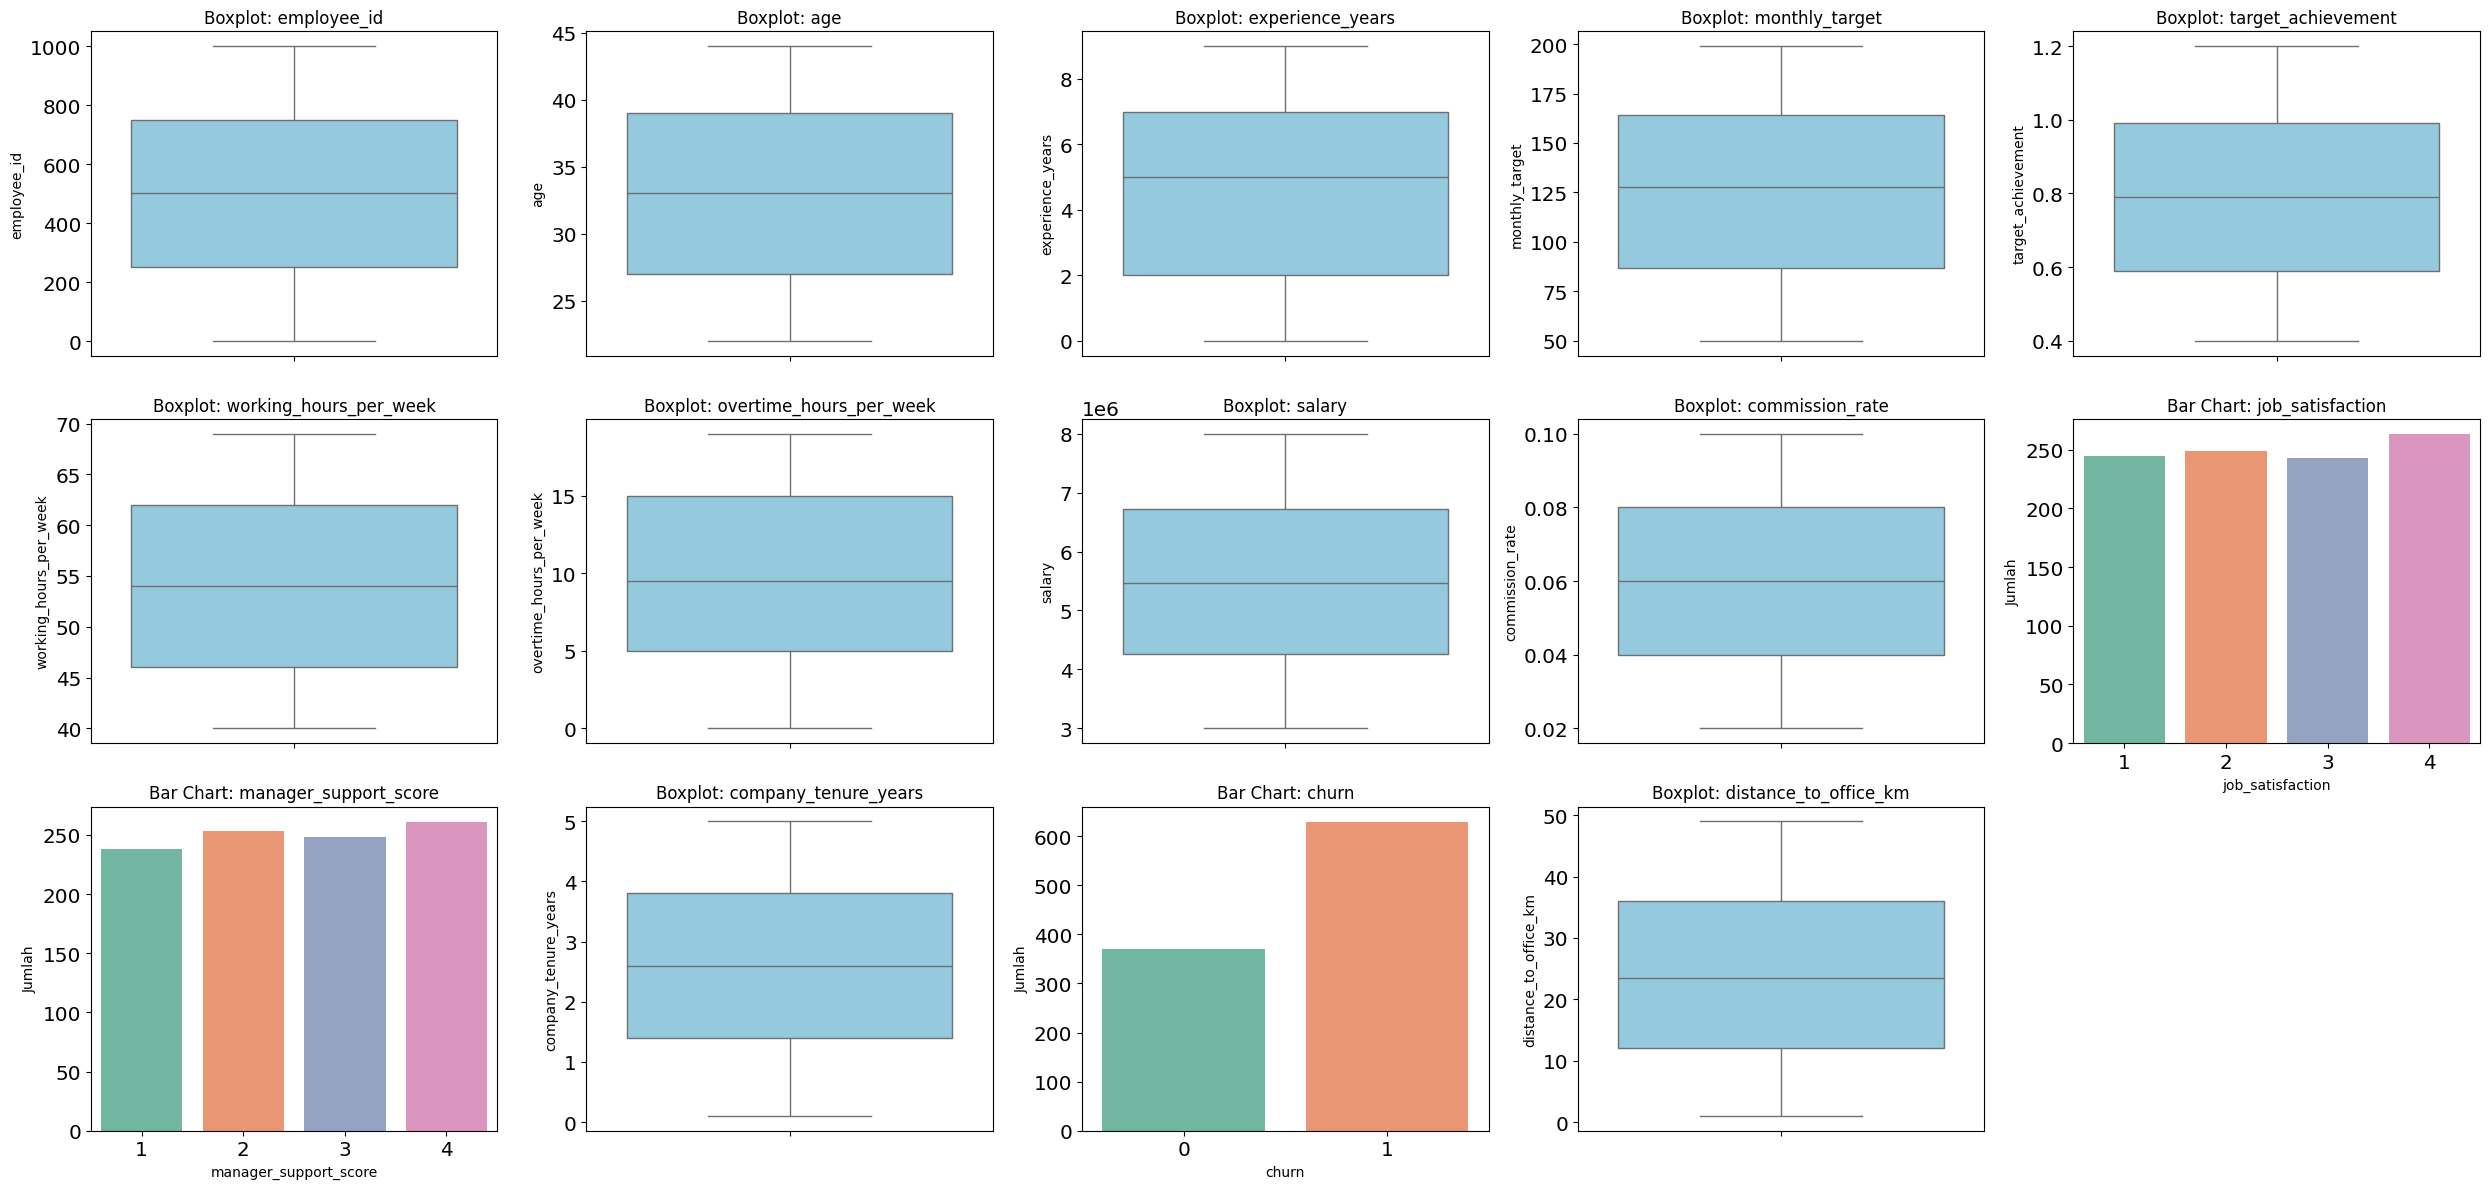

In [ ]:
def plot_eda_grid(data, threshold_kategori=5, n_rows=3, n_cols=5):

    total_plots = n_rows * n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    axes = axes.flatten()

    for i, col in enumerate(nums):
        if i >= total_plots:
            break  # cukup 15 grafik (3x5)

        ax = axes[i]
        unique_vals = data[col].nunique()

        if unique_vals <= threshold_kategori:
            sns.countplot(x=col, hue=col, data=data, palette='Set2', ax=ax, legend=False)
            ax.set_title(f'Bar Chart: {col}')
            ax.set_ylabel('Jumlah')
        else:
            sns.boxplot(y=data[col], color='skyblue', ax=ax)
            ax.set_title(f'Boxplot: {col}')
            ax.set_ylabel(col)

        ax.grid(False)

    # Matikan subplot kosong jika kolom < total slot
    for j in range(len(nums), total_plots):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_eda_grid(data)

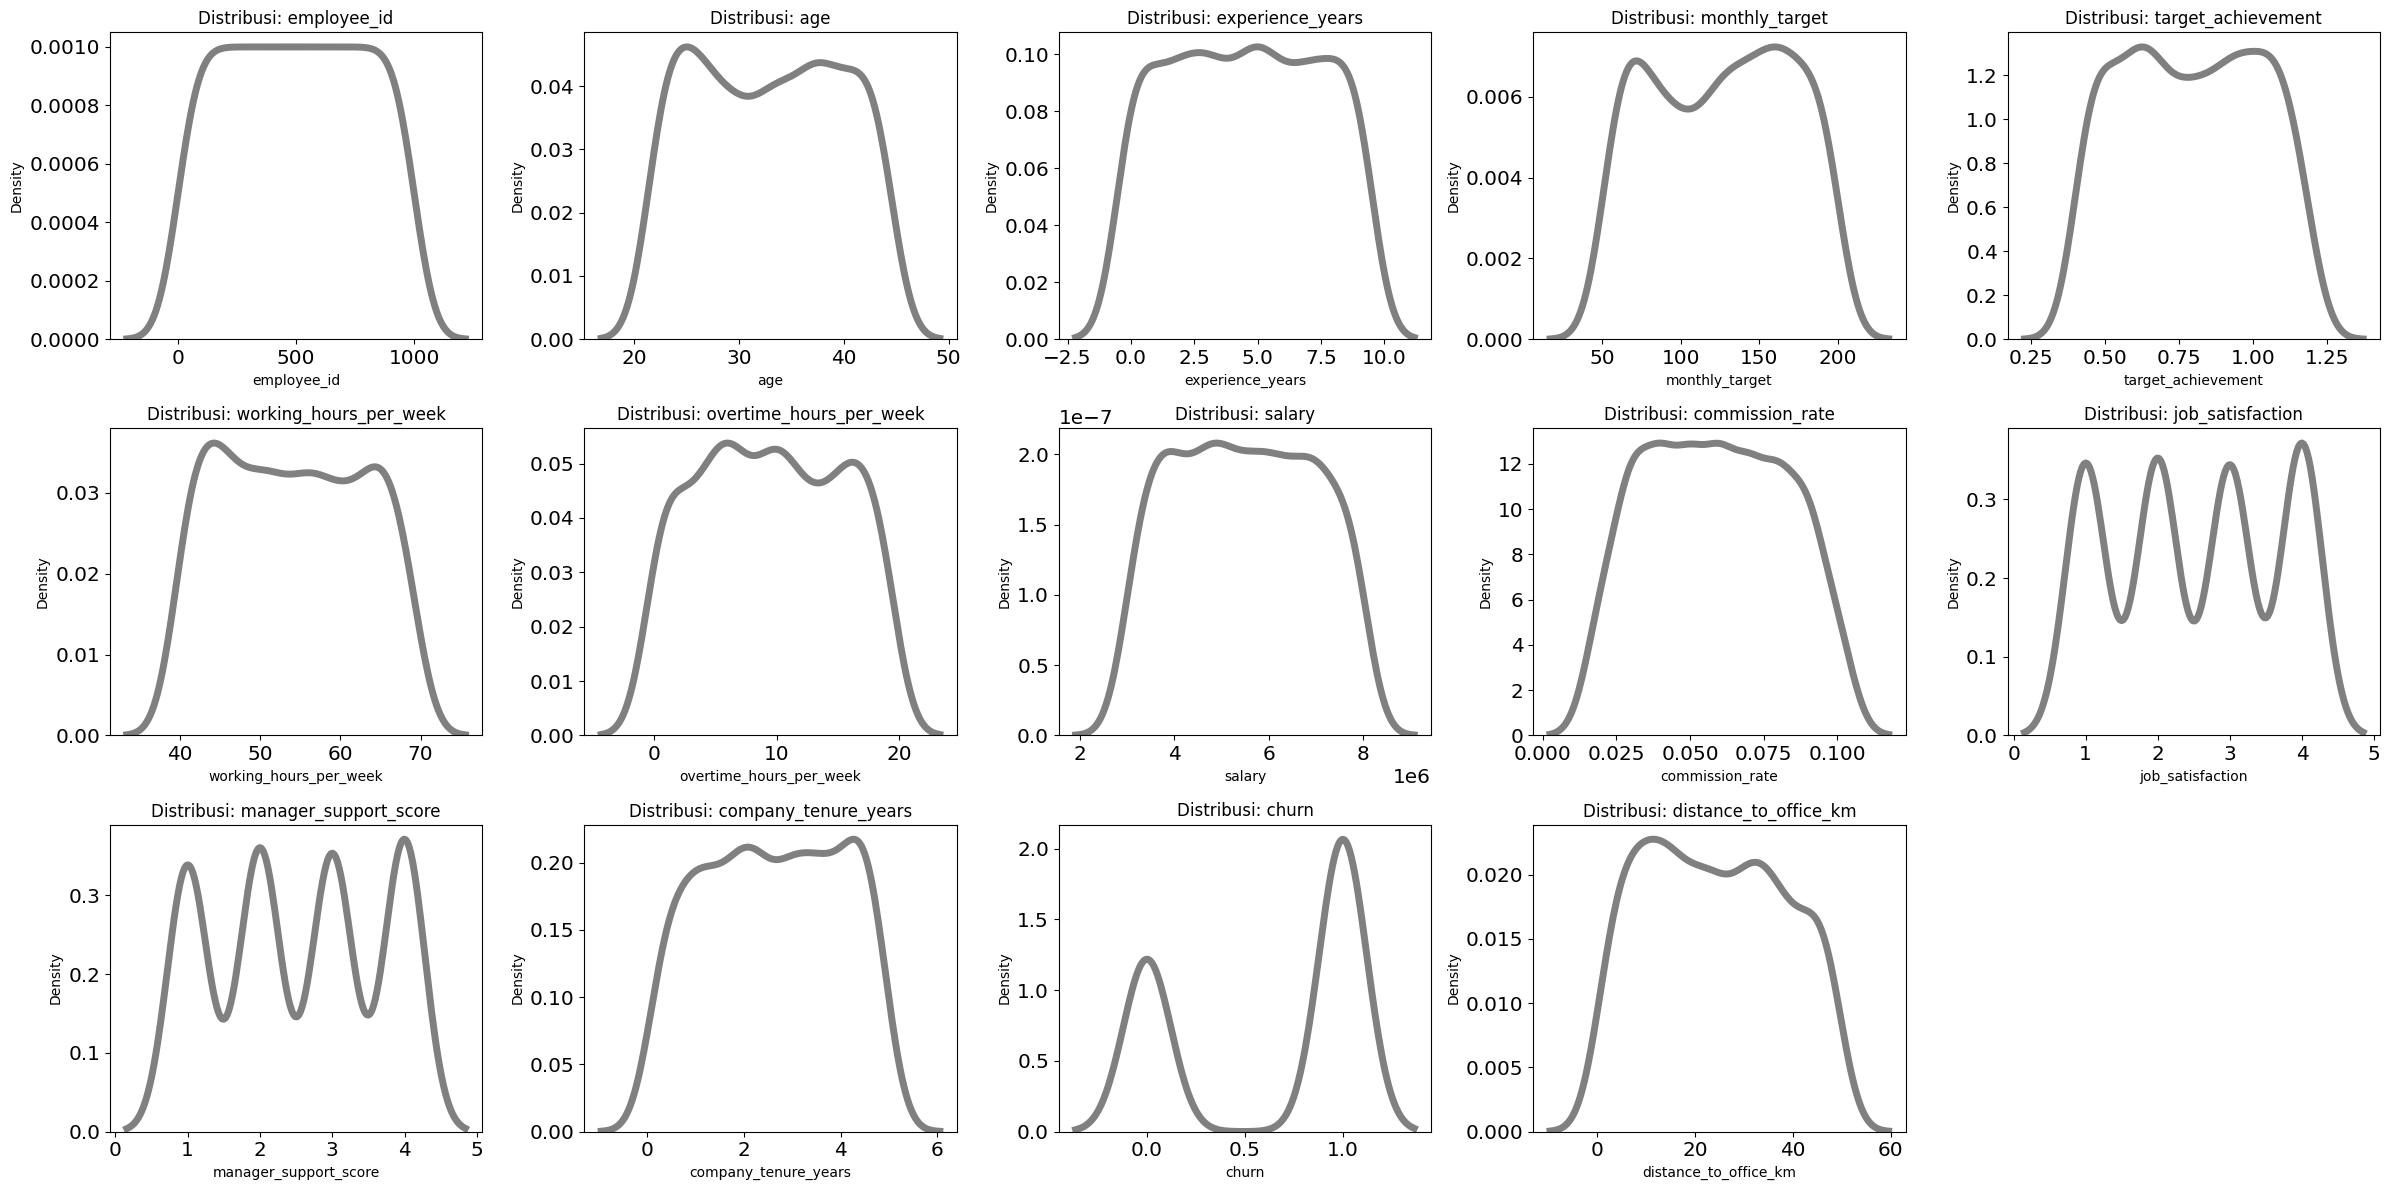

In [ ]:
plt.figure(figsize=(24, 12))  # Lebar dan tinggi ditingkatkan

for i in range(0, len(nums)):
    plt.subplot(3, 5, i + 1)  # posisi subplot
    sns.kdeplot(x=data[nums[i]], color='gray', linewidth=5)
    plt.xlabel(nums[i], fontsize=10)
    plt.title(f'Distribusi: {nums[i]}', fontsize=12)
    plt.grid(False)

plt.tight_layout()
plt.show()

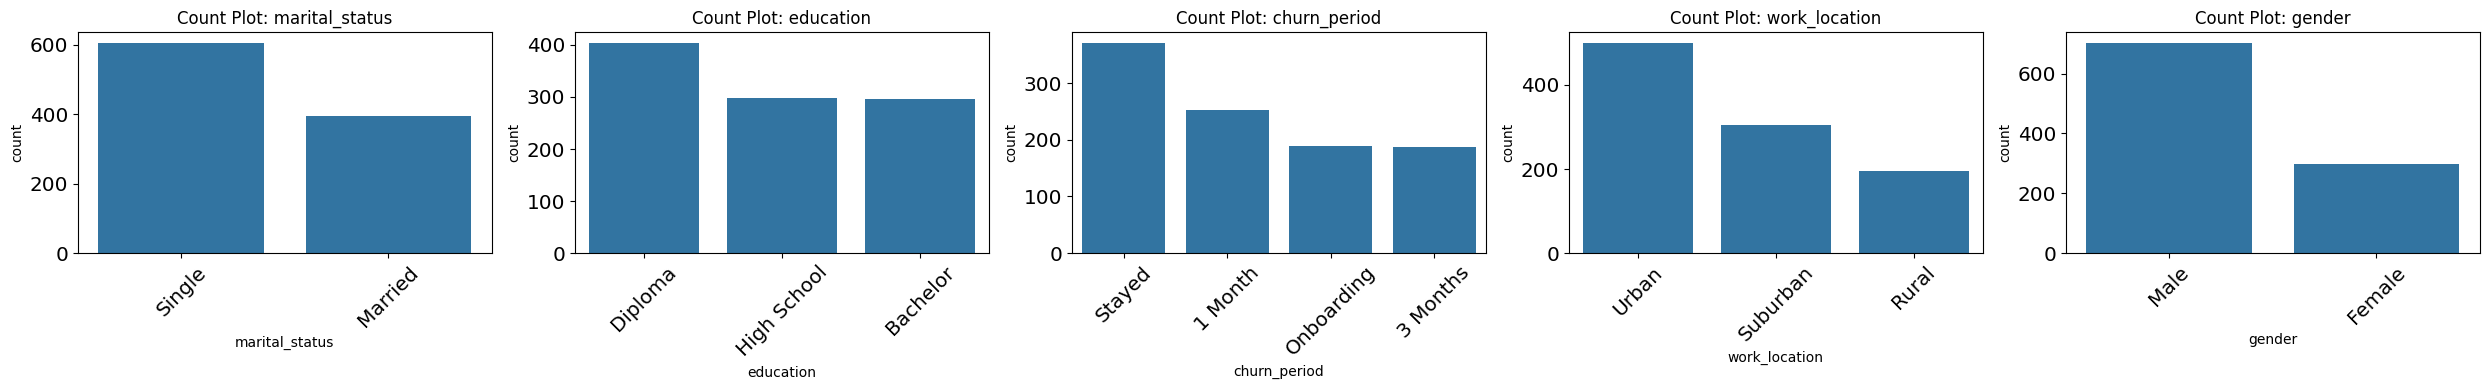

In [ ]:
# Jumlah kolom per baris
n_cols = 5
n_plots = len(cats)
n_rows = (n_plots + n_cols - 1) // n_cols  # hitung jumlah baris

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # supaya bisa diakses seperti list

# Loop tiap kolom kategori dan plot
for i, col in enumerate(cats):
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan axes yang tidak terpakai
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

bivariate

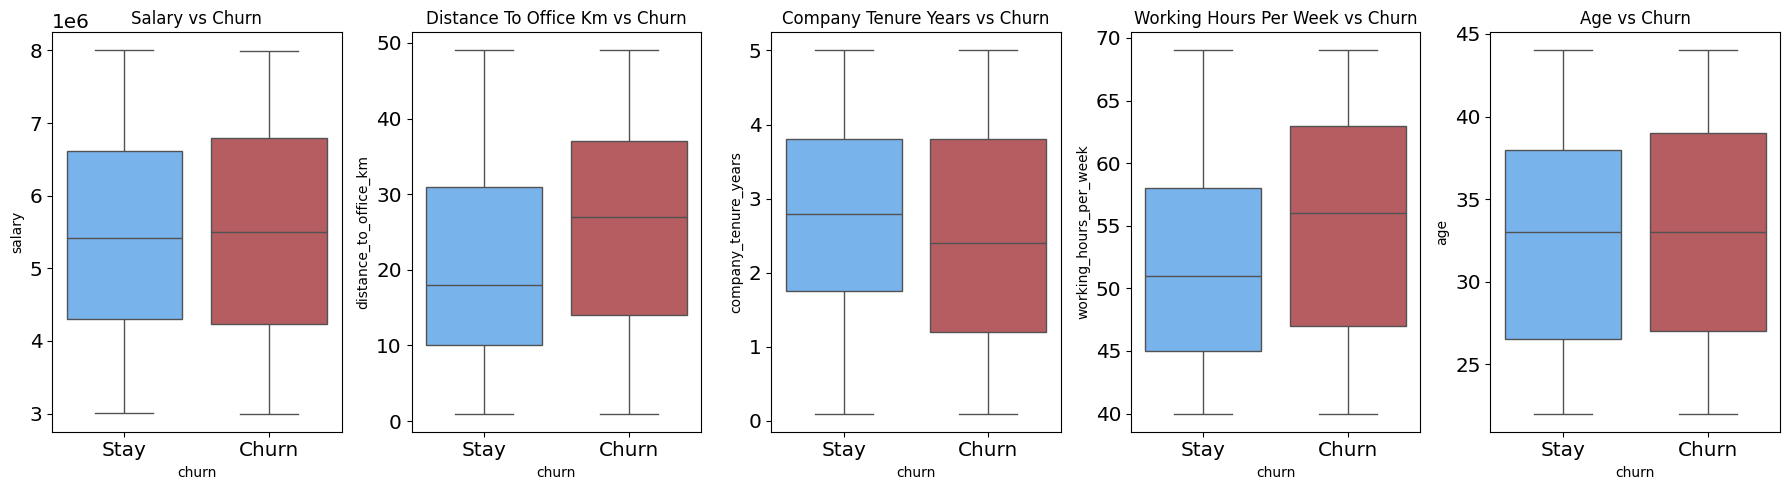

In [ ]:
bivar_cols = ['salary', 'distance_to_office_km', 'company_tenure_years','working_hours_per_week', 'age']

plt.figure(figsize=(18, 5))

for i, col in enumerate(bivar_cols):
    ax = plt.subplot(1, len(bivar_cols), i + 1)
    sns.boxplot(x='churn', y=col, data=data, palette=['#66b3ff', '#C44E52'], ax=ax)
    ax.set_xticklabels(['Stay', 'Churn'])
    ax.set_title(f'{col.replace("_", " ").title()} vs Churn')
    ax.grid(False)

plt.tight_layout()
plt.show()

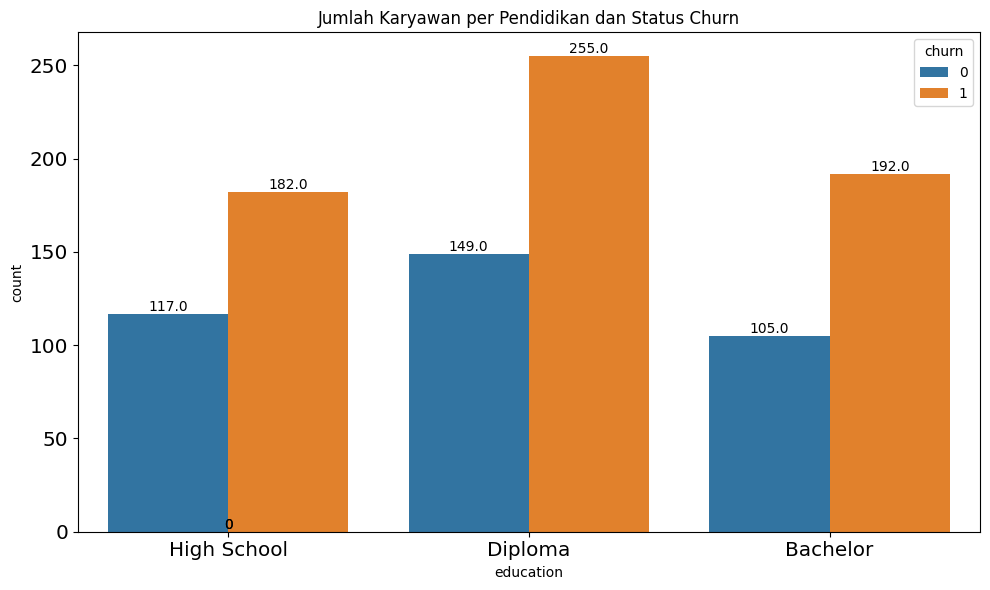

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='education', hue='churn', data=data)

# Tambahkan angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Karyawan per Pendidikan dan Status Churn')
plt.tight_layout()
plt.show()

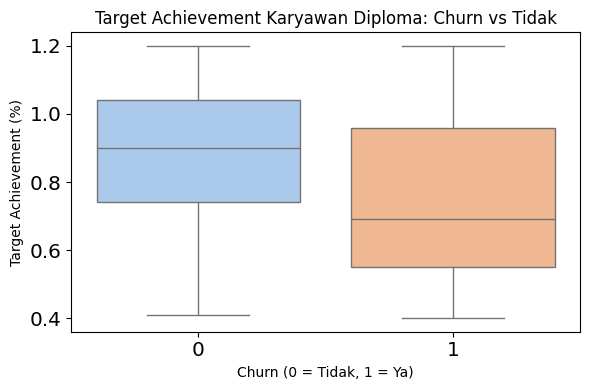

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='churn', y='target_achievement', palette='pastel')
plt.title('Target Achievement Karyawan Diploma: Churn vs Tidak')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Target Achievement (%)')
plt.tight_layout()
plt.show()

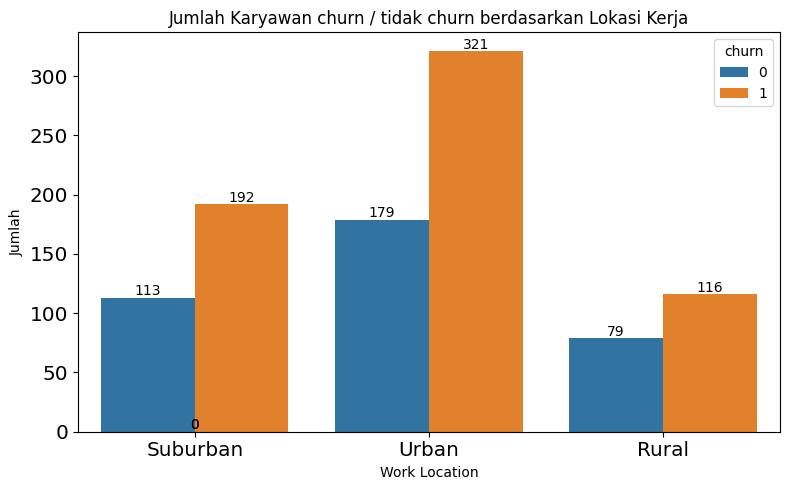

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='work_location', hue='churn', data=data)

# Tambahkan label angka di tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2,   # posisi
            f'{height:.0f}', ha="center", fontsize=10)

plt.title("Jumlah Karyawan churn / tidak churn berdasarkan Lokasi Kerja")
plt.xlabel("Work Location")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

In [ ]:
avg_salary_by_location = data.groupby('work_location')['salary'].median().sort_values(ascending=False)
print(avg_salary_by_location)

work_location
Urban      5520646.50
Rural      5418126.00
Suburban   5282373.00
Name: salary, dtype: float64


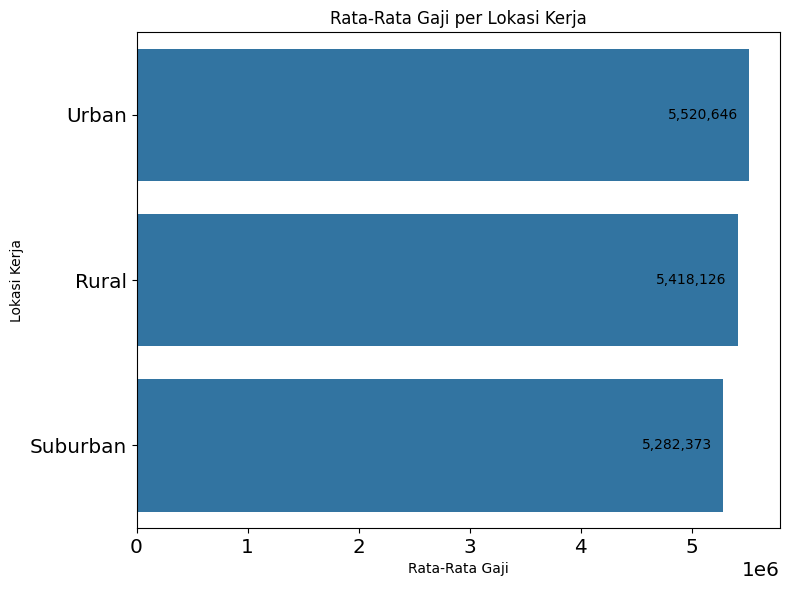

In [ ]:
plt.figure(figsize=(8,6 ))
ax = sns.barplot(y=avg_salary_by_location.index, x=avg_salary_by_location.values)

# Tambahkan nilai di ujung bar
for i, v in enumerate(avg_salary_by_location.values):
    ax.text(v - 100000, i, f'{v:,.0f}', va='center', ha='right')

plt.title("Rata-Rata Gaji per Lokasi Kerja")
plt.xlabel("Rata-Rata Gaji")
plt.ylabel("Lokasi Kerja")
plt.tight_layout()
plt.show()

multivariate

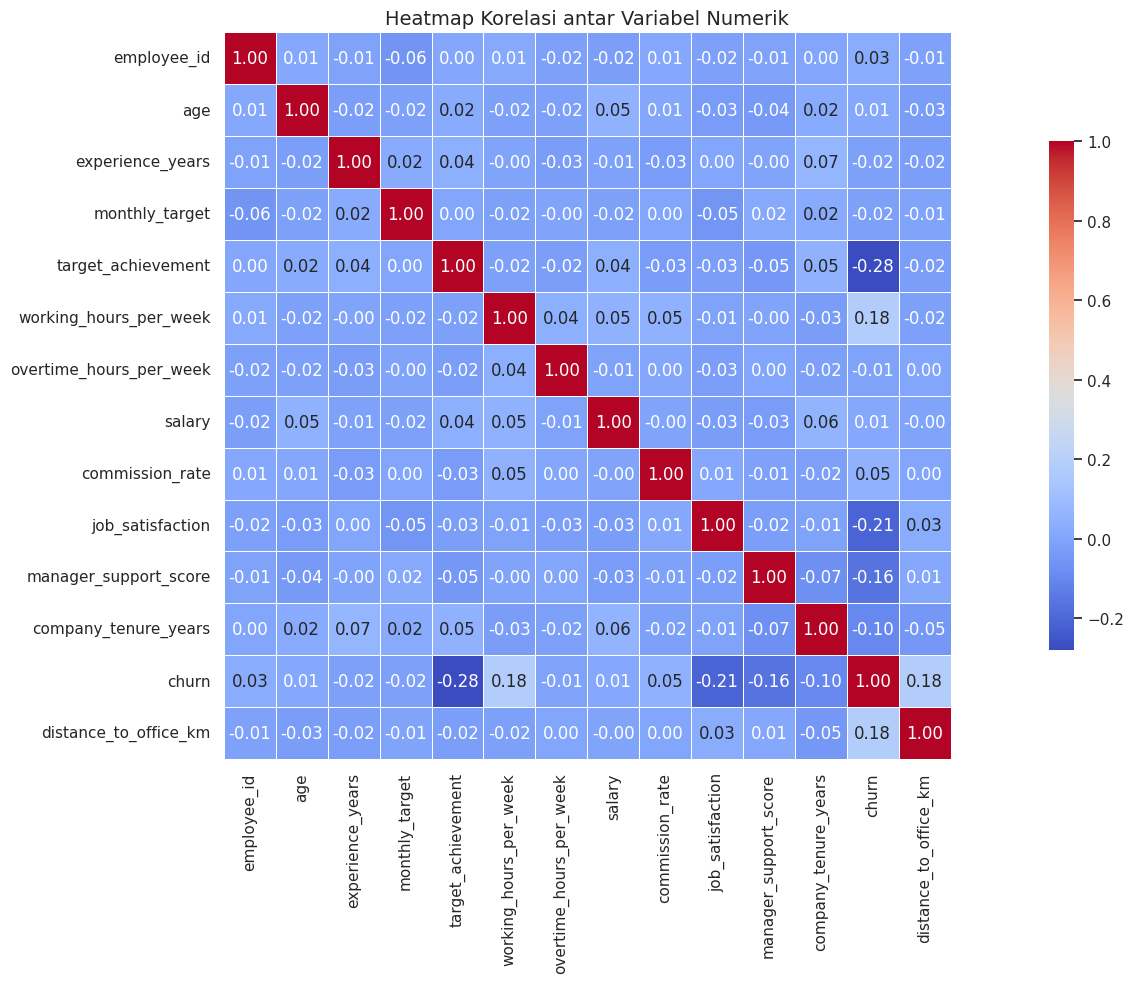

In [ ]:
corr_matrix = data[nums].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.set(style="white")

sns.heatmap(
    corr_matrix,
    annot=True,          # tampilkan angka korelasi
    fmt=".2f",           # 2 desimal
    cmap='coolwarm',     # warna dari merah ke biru
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .7}
)

plt.title('Heatmap Korelasi antar Variabel Numerik', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Engineer


In [ ]:
data['target_gap'] = data['monthly_target'] - data['target_achievement']                            # Estimasi jarak mencapai target
data['overwork_ratio'] = data['overtime_hours_per_week'] / data['working_hours_per_week'].replace(0, np.nan)  # Flagging burnout (value tinggi potensi relasi dengan capek yang relasi positif dengan churn)
data['tenure_per_age'] = data['company_tenure_years'] / (data['age'].replace(0, np.nan))                        # Indikasi loyalitas (makin tinggi makin loyal)
data['income_per_hour'] = data['salary'] / ((data['working_hours_per_week'].replace(0, np.nan)) * 4.3)        # Representasi efisiensi gaji (gaji kecil bisa saja peluang jadi churn)
data['experience_to_tenure'] = data['experience_years'] / (data['company_tenure_years'] + 1)        # pengalaman yang dipunya VS lama kerja

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [ ]:
data.sample()

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period,target_gap,overwork_ratio,tenure_per_age,income_per_hour,experience_to_tenure
93,94,22,Female,High School,2,187,0.73,42,11,3662213,0.08,2,Urban,4,4.40,0,Single,16,Stayed,186.27,0.26,0.20,20278.03,0.37


### Transformation
Include:
- Scaling
- Encoding
- Imbalance Handling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

In [ ]:
# Feature Encoding
df = data.copy()
df = df.drop(columns=['employee_id', 'churn_period']) # churn_period dibuang karena memberi informasi waktu yang diperlukan sebelum churning, hal ini dapat membuat model menjadi overfit terhadap sebuah preset data
df = df.dropna()

education_map = {'High School': 0, 'Diploma': 1, 'Bachelor': 2}     # Edukasi di mapping ulang
df['education'] = df['education'].map(education_map)

categorical_cols = ['gender', 'marital_status', 'work_location']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df_encoded.sample(5)

,age,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,manager_support_score,company_tenure_years,churn,distance_to_office_km,target_gap,overwork_ratio,tenure_per_age,income_per_hour,experience_to_tenure,gender_Male,marital_status_Single,work_location_Suburban,work_location_Urban
612,25,1,0,61,0.61,46,5,3135797,0.05,4,4,1.40,0,11,60.39,0.11,0.06,15853.37,0.00,False,True,True,False
468,23,1,3,170,1.01,64,0,3786796,0.03,4,4,0.80,1,19,168.99,0.00,0.03,13760.16,1.67,False,True,False,False
355,23,0,8,153,0.72,65,11,3638922,0.05,2,1,0.20,1,44,152.28,0.17,0.01,13019.40,6.67,True,True,False,True
586,31,1,2,95,0.49,40,11,7589079,0.04,3,2,0.50,1,47,94.51,0.28,0.02,44122.55,1.33,False,True,True,False
938,38,1,0,91,0.95,66,10,4125832,0.05,2,2,0.20,1,39,90.05,0.15,0.01,14537.82,0.00,True,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   education                1000 non-null   int64  
 2   experience_years         1000 non-null   int64  
 3   monthly_target           1000 non-null   int64  
 4   target_achievement       1000 non-null   float64
 5   working_hours_per_week   1000 non-null   int64  
 6   overtime_hours_per_week  1000 non-null   int64  
 7   salary                   1000 non-null   int64  
 8   commission_rate          1000 non-null   float64
 9   job_satisfaction         1000 non-null   int64  
 10  manager_support_score    1000 non-null   int64  
 11  company_tenure_years     1000 non-null   float64
 12  churn                    1000 non-null   int64  
 13  distance_to_office_km    1000 non-null   int64  
 14  target_gap               

In [ ]:
# pisahkan x,y dan split data test dan train
# Pisahkan X dan y
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)




In [ ]:
'''
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)
'''

In [ ]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Fit model dengan data hasil SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and Evaluate Each Model
for name, model in models.items():
    print(f"\n===== {name} =====")

    # Gunakan hasil SMOTE untuk training
    model.fit(X_train_sm, y_train_sm)

    # Gunakan X_test_scaled untuk prediksi (bukan SMOTE)
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))


===== Logistic Regression =====
Confusion Matrix:
[[48 26]
 [37 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60        74
           1       0.77      0.71      0.74       126

    accuracy                           0.69       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.70      0.69      0.69       200


===== Decision Tree =====
Confusion Matrix:
[[45 29]
 [43 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.56        74
           1       0.74      0.66      0.70       126

    accuracy                           0.64       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.66      0.64      0.64       200


===== Random Forest =====
Confusion Matrix:
[[ 45  29]
 [ 26 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0

In [ ]:
#training and evaluation
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

results = []

for name, model in models.items():
    print(f"\n===== {name} =====")

    model.fit(X_train_sm, y_train_sm)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Skor
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results.append({
        "Model": name,
        "Train Recall": round(train_recall, 2),
        "Test Recall": round(test_recall, 2),
        "Train Accuracy": round(train_acc, 2),
        "Test Accuracy": round(test_acc, 2),
        "Train ROC-AUC": round(train_roc, 2),
        "Test ROC-AUC": round(test_roc, 2),
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)



===== Logistic Regression =====

===== Decision Tree =====

===== Random Forest =====

===== SVM =====

===== KNN =====
                 Model  Train Recall  Test Recall  Train Accuracy  Test Accuracy  Train ROC-AUC  Test ROC-AUC
0  Logistic Regression          1.00         1.00            0.63           0.63           0.50          0.50
1        Decision Tree          1.00         1.00            0.63           0.63           0.50          0.50
2        Random Forest          0.99         1.00            0.63           0.63           0.43          0.49
3                  SVM          1.00         1.00            0.63           0.63           0.50          0.50
4                  KNN          0.00         0.00            0.37           0.37           0.50          0.50


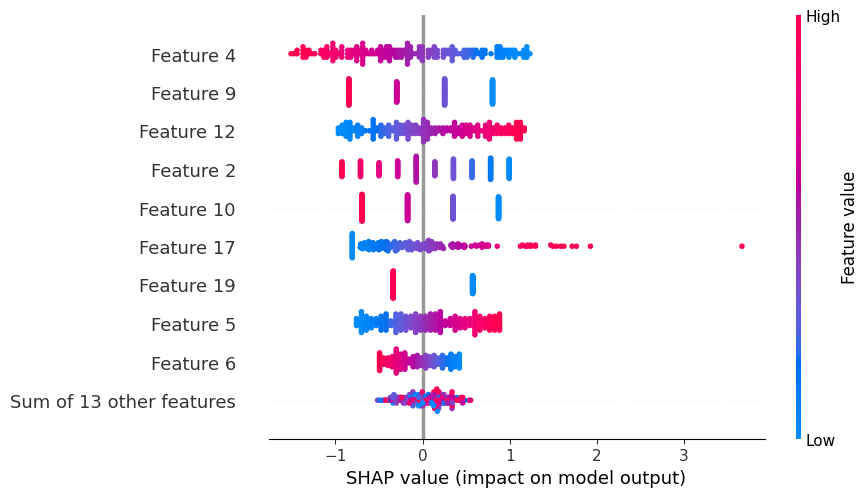

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_sm, y_train_sm)

#SHAP
import shap

explainer = shap.Explainer(model_lr, X_train_scaled)  # pastikan ini pakai fitur yang sesuai
shap_values = explainer(X_test_scaled)

shap.plots.beeswarm(shap_values)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_sm, y_train_sm)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
#Hyperparameter Tuning untuk Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train_selected, y_train_sm)

print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)


Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC: 0.8812904236877719


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Buat ulang model dengan parameter terbaik
best_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Latih model di data training hasil seleksi fitur
best_rf.fit(X_train_selected, y_train_sm)

# Prediksi
y_test_pred = best_rf.predict(X_test_selected)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test_selected)[:, 1]))


Confusion Matrix:
 [[56 18]
 [36 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.67        74
           1       0.83      0.71      0.77       126

    accuracy                           0.73       200
   macro avg       0.72      0.74      0.72       200
weighted avg       0.75      0.73      0.73       200

ROC-AUC Score: 0.8255040755040755


In [ ]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

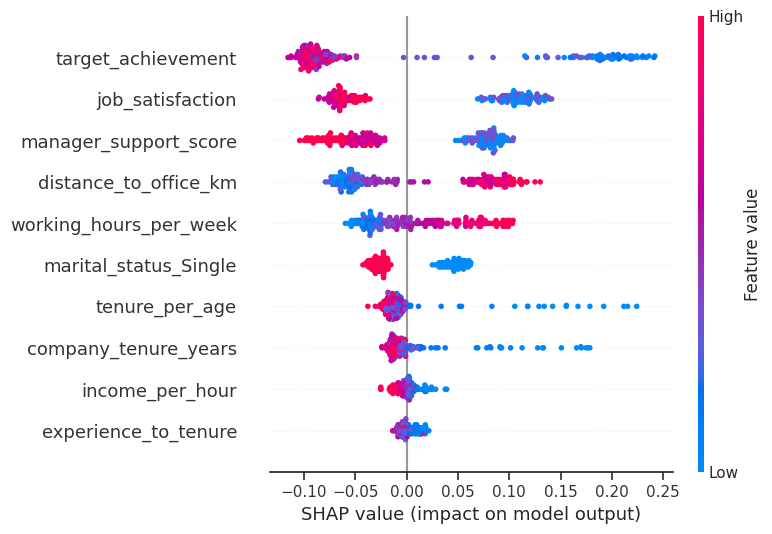

In [ ]:
import shap

# Ambil nama fitur terpilih dari selector
selected_feature_names = X_train.columns[selector.get_support()]

# Konversi X_test_selected ke DataFrame dengan nama kolom
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Buat explainer dari model Random Forest
explainer = shap.Explainer(best_rf, X_train_selected)

# Hitung SHAP values
shap_values = explainer(X_test_selected)

# Plot SHAP summary khusus untuk kelas 1 (resign)
shap.summary_plot(shap_values.values[:, :, 1], X_test_selected, max_display=10)


In [ ]:
selected_feature_names = X_train.columns[selector.get_support()]
print(selected_feature_names)
print(len(selected_feature_names))

Index(['target_achievement', 'working_hours_per_week', 'job_satisfaction',
       'manager_support_score', 'company_tenure_years',
       'distance_to_office_km', 'tenure_per_age', 'income_per_hour',
       'experience_to_tenure', 'marital_status_Single'],
      dtype='object')
10


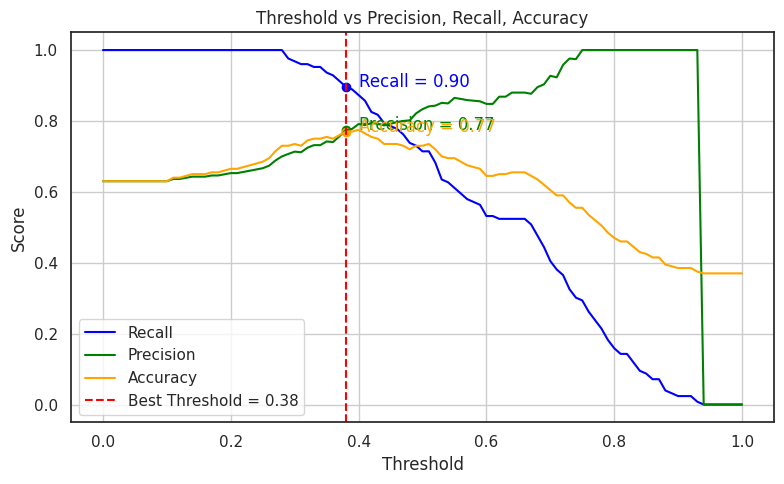

📍 Best Threshold (by F1-score): 0.38


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Probabilitas prediksi
y_probs = best_rf.predict_proba(X_test_selected)[:, 1]

# Thresholds dari 0.0 ke 1.0
thresholds = np.arange(0.0, 1.01, 0.01)

precisions = []
recalls = []
accuracies = []
f1s = []

# Hitung metrik untuk tiap threshold
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))

# Tentukan threshold terbaik berdasarkan F1-score tertinggi
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]

# Buat plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='green')
plt.plot(thresholds, accuracies, label='Accuracy', color='orange')

# Garis vertikal untuk threshold terbaik
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.scatter(best_threshold, recalls[best_idx], color='blue')
plt.scatter(best_threshold, precisions[best_idx], color='green')
plt.scatter(best_threshold, accuracies[best_idx], color='orange')

# Tampilkan nilai metrik di titik threshold terbaik
plt.text(best_threshold + 0.02, recalls[best_idx], f"Recall = {recalls[best_idx]:.2f}", color='blue')
plt.text(best_threshold + 0.02, precisions[best_idx], f"Precision = {precisions[best_idx]:.2f}", color='green')
plt.text(best_threshold + 0.02, accuracies[best_idx], f"Accuracy = {accuracies[best_idx]:.2f}", color='orange')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision, Recall, Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"📍 Best Threshold (by F1-score): {best_threshold:.2f}")


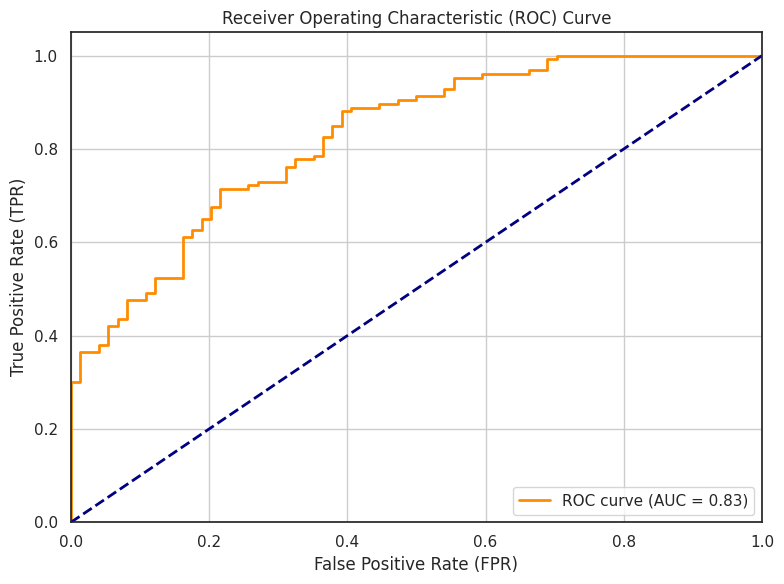

In [ ]:
#ROC CURVE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Hitung probabilitas prediksi kelas 1
y_probs = best_rf.predict_proba(X_test_selected)[:, 1]

# Hitung nilai FPR, TPR, dan threshold dari ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Hitung AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis diagonal random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

# Fit scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
rf = best_rf(random_state=42)
rf.fit(X_train_scaled, y_train)

# Save updated model and scaler
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

NameError: name 'sample_weights' is not defined

In [ ]:
import pickle

# Load model dan scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# Cek feature names
print("=== MODEL FEATURES ===")
if hasattr(model, 'feature_names_in_'):
    print("Model features:", list(model.feature_names_in_))
    print("Number of features:", len(model.feature_names_in_))
else:
    print("Model tidak memiliki feature_names_in_")

print("\n=== SCALER FEATURES ===")
if hasattr(scaler, 'feature_names_in_'):
    print("Scaler features:", list(scaler.feature_names_in_))
    print("Number of features:", len(scaler.feature_names_in_))
else:
    print("Scaler tidak memiliki feature_names_in_")

# Cek jumlah features yang diharapkan
if hasattr(model, 'n_features_in_'):
    print(f"\nModel expects {model.n_features_in_} features")
if hasattr(scaler, 'n_features_in_'):
    print(f"Scaler expects {scaler.n_features_in_} features")

# Tampilkan semua atribut
print("\n=== MODEL ATTRIBUTES ===")
for attr in dir(model):
    if not attr.startswith('_') and not callable(getattr(model, attr)):
        try:
            value = getattr(model, attr)
            print(f"{attr}: {type(value)}")
        except:
            pass